In [1]:
#example using model_alerting_and_performance_evaluation.py
#GOAL: 1. tau based on percentile 2. cost stuff (gain)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

In [3]:
%load_ext autoreload
%autoreload 1
%aimport model_alerting_and_performance_evaluation
mape = model_alerting_and_performance_evaluation

In [4]:
#need to generate data that has 4 columns:
# each row represents the output for a given patient enounter at a set time-step
# eID: encounterID - this is what groups a patient's encounter (encounter) together
# p: the probability (risk estimate) for each encounter time-step
# y: the true label for that encounter (assume that there's only 1 label fper encounter)
# observer: the observer who would see an alert for that given encounter time-step (e.g. the primary contact physician)

# assumes that data are in ascending temporal order
# assumes one there's one observer per encounter time-step

#TODOS:
# add time-step functionality
# assumes 

# simulate data

In [5]:
#generate underlying risk (p)
rng = np.random.default_rng()
n = 200

p = rng.uniform(size=n)
y = rng.binomial(1, p)

l = rng.integers(2, 10, size=n)
n_t = sum(l)

e_t = rng.normal(0.0, 0.1, size=n_t)

In [6]:
#generate risk estimates for every encounter time-step
ci = []
cp = []
co = []
cy = []

n_obs = 3

for i, p_i in enumerate(p):
    _l = rng.integers(2,10)
    e_t = rng.normal(0.0, 0.1, size=_l)
    
    ci += [i]*_l
    cp += list(p_i + e_t.cumsum())
    cy += [y[i]]*_l
    
    o_i = [i]*_l
    o_i_mod = rng.binomial(1, 0.1, size=_l).cumsum()
    o_i += o_i_mod
    o_i = o_i%n_obs
    
    co += list(o_i)

In [7]:
# turn it into a dataframe with the following columns: 'eID', 'p', 'y', 'observer'
df = pd.DataFrame({'eID':ci, 'p':cp, 'y': cy, 'observer':co})
df.head()

,eID,p,y,observer
0,0,0.446295,1,0
1,0,0.338252,1,0
2,0,0.222435,1,0
3,0,0.311781,1,0
4,1,0.223294,0,2


# overall performance

In [8]:
_ = df.groupby(by='eID').max()
metrics.roc_auc_score(_['y'], _['p'])

0.8001205908953873

# compute alerts and performance

In [9]:
ap_res, oc_res = mape.compute_alerts_and_performance(df, return_oc_res=True, tau_on_percentile=True)
ap_res.head()

,tau,tn,fp,fn,tp,oa_max,oa_min,oa_mean,oa_med,oa_sum,sens,spec,ppv,npv,proportion_unalerted
0,0.000000,0,107,0,93,71,64,66.666667,65.0,200,1.0,0.000000,0.465000,NaN,0.000
1,0.041667,0,107,0,93,71,64,66.666667,65.0,200,1.0,0.000000,0.465000,NaN,0.000
2,0.083333,7,100,0,93,67,59,64.333333,67.0,193,1.0,0.065421,0.481865,1.0,0.035
3,0.125000,10,97,0,93,67,58,63.333333,65.0,190,1.0,0.093458,0.489474,1.0,0.050
4,0.166667,15,92,0,93,65,56,61.666667,64.0,185,1.0,0.140187,0.502703,1.0,0.075


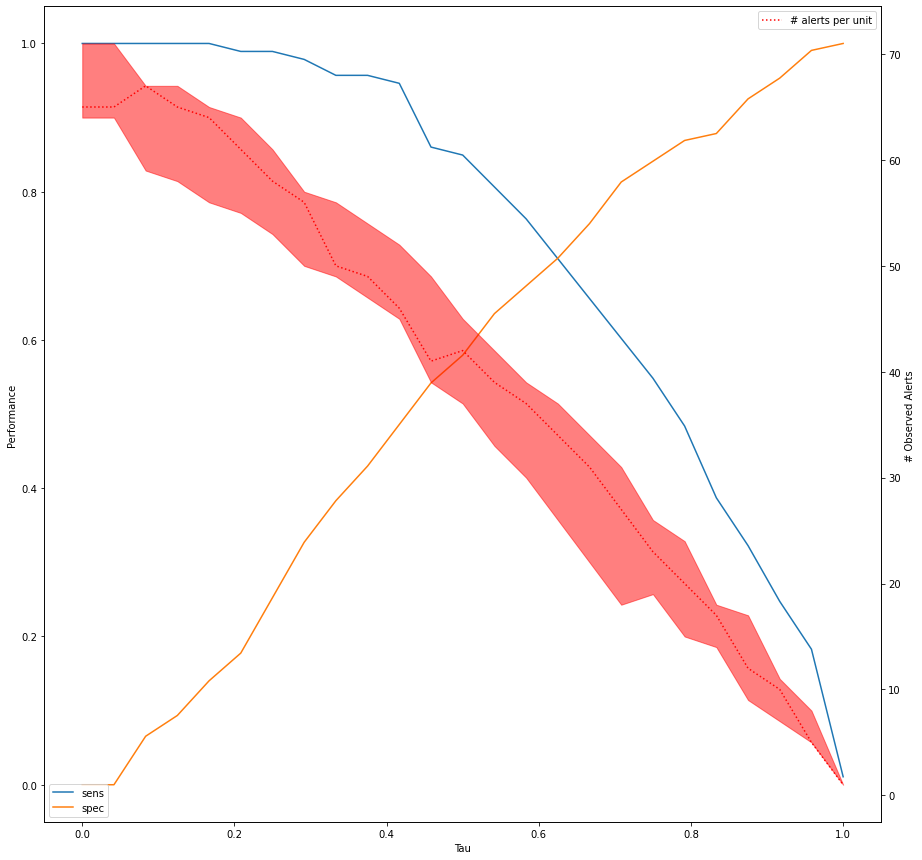

In [10]:
mape.plot_alerts_and_performance(ap_res)

In [11]:
ap_res

,tau,tn,fp,fn,tp,oa_max,oa_min,oa_mean,oa_med,oa_sum,sens,spec,ppv,npv,proportion_unalerted
0,0.000000,0,107,0,93,71,64,66.666667,65.0,200,1.000000,0.000000,0.465000,NaN,0.000
1,0.041667,0,107,0,93,71,64,66.666667,65.0,200,1.000000,0.000000,0.465000,NaN,0.000
2,0.083333,7,100,0,93,67,59,64.333333,67.0,193,1.000000,0.065421,0.481865,1.000000,0.035
3,0.125000,10,97,0,93,67,58,63.333333,65.0,190,1.000000,0.093458,0.489474,1.000000,0.050
4,0.166667,15,92,0,93,65,56,61.666667,64.0,185,1.000000,0.140187,0.502703,1.000000,0.075
5,0.208333,19,88,1,92,64,55,60.000000,61.0,180,0.989247,0.177570,0.511111,0.950000,0.100
6,0.250000,27,80,1,92,61,53,57.333333,58.0,172,0.989247,0.252336,0.534884,0.964286,0.140
7,0.291667,35,72,2,91,57,50,54.333333,56.0,163,0.978495,0.327103,0.558282,0.945946,0.185
8,0.333333,41,66,4,89,56,49,51.666667,50.0,155,0.956989,0.383178,0.574194,0.911111,0.225
9,0.375000,46,61,4,89,54,47,50.000000,49.0,150,0.956989,0.429907,0.593333,0.920000,0.250


In [12]:
'''def plot_gain(ap_res,
              alpha=np.expand_dims(np.linspace(0.1,0.3, 5), axis=1), 
              kappa = 10000,
              beta = 20):
    
    #alpha: effectiveness
    #kappa: cost of CDI
    #beta: intervention cost
    
    n_intervene = np.expand_dims((ap_res['tp']+ap_res['fp']).values, axis=0)
    n_intervene_pos = np.expand_dims((ap_res['tp']).values, axis=0)
    v = alpha*kappa*n_intervene_pos - beta*n_intervene

    for i,_a in enumerate(alpha):
        plt.plot(list(ap_res['tau']), v[i], label='alpha={}'.format(_a[0]))

    plt.xlabel('tau')
    plt.ylabel('Gain')
    plt.legend()
    plt.show()'''


def plot_alerts_and_incidence_reduction(ap_res, performance_measures=['sens', 'spec']):
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    for m in performance_measures:
        ax1.plot(ap_res['tau'], ap_res[m], label=m)


    ax2.plot(ap_res['tau'], ap_res['oa_med'], ':', color='r', label='# alerts per unit')
    ax2.fill_between(ap_res['tau'], ap_res['oa_max'], ap_res['oa_min'], color='r', alpha=0.5,)

    ax1.set_xlabel('Tau')
    ax1.set_ylabel('Performance')
    ax2.set_ylabel('# Observed Alerts ')

    ax1.legend(loc='lower left')
    ax2.legend(loc='upper right')

    plt.show()

# tradeoff

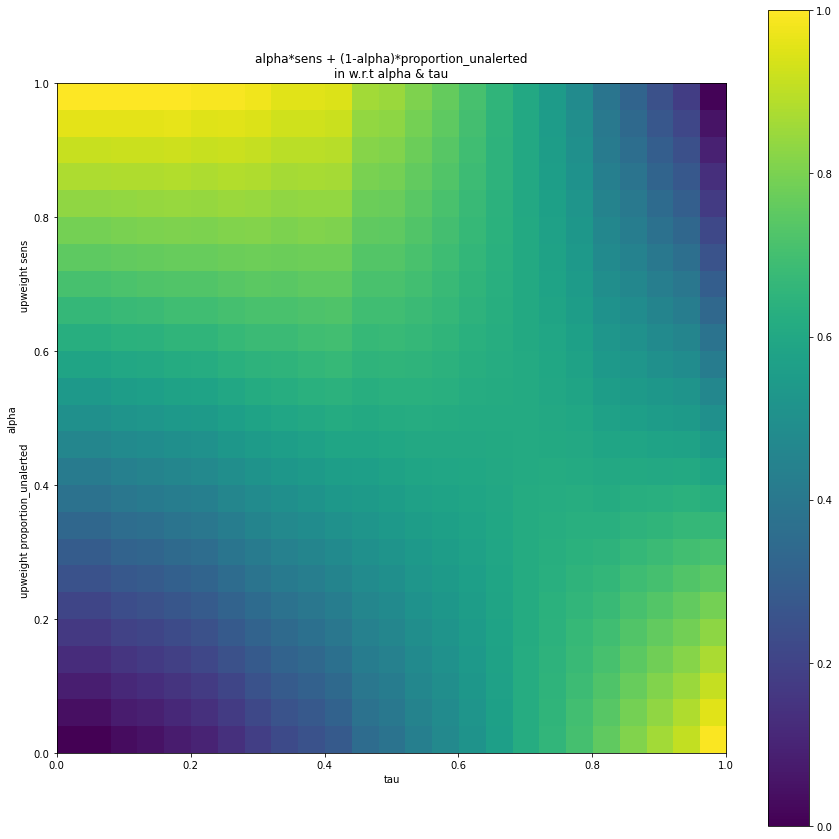

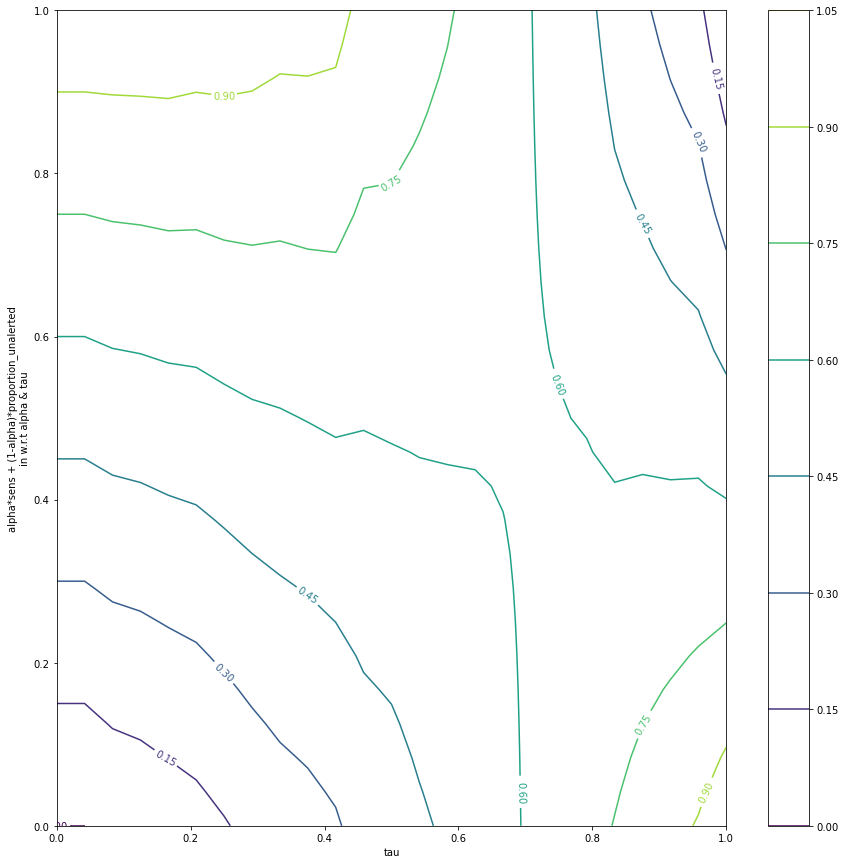

In [13]:
mape.plot_trade_off(ap_res)

# gain

In [14]:
ap_res.head()

,tau,tn,fp,fn,tp,oa_max,oa_min,oa_mean,oa_med,oa_sum,sens,spec,ppv,npv,proportion_unalerted
0,0.000000,0,107,0,93,71,64,66.666667,65.0,200,1.0,0.000000,0.465000,NaN,0.000
1,0.041667,0,107,0,93,71,64,66.666667,65.0,200,1.0,0.000000,0.465000,NaN,0.000
2,0.083333,7,100,0,93,67,59,64.333333,67.0,193,1.0,0.065421,0.481865,1.0,0.035
3,0.125000,10,97,0,93,67,58,63.333333,65.0,190,1.0,0.093458,0.489474,1.0,0.050
4,0.166667,15,92,0,93,65,56,61.666667,64.0,185,1.0,0.140187,0.502703,1.0,0.075


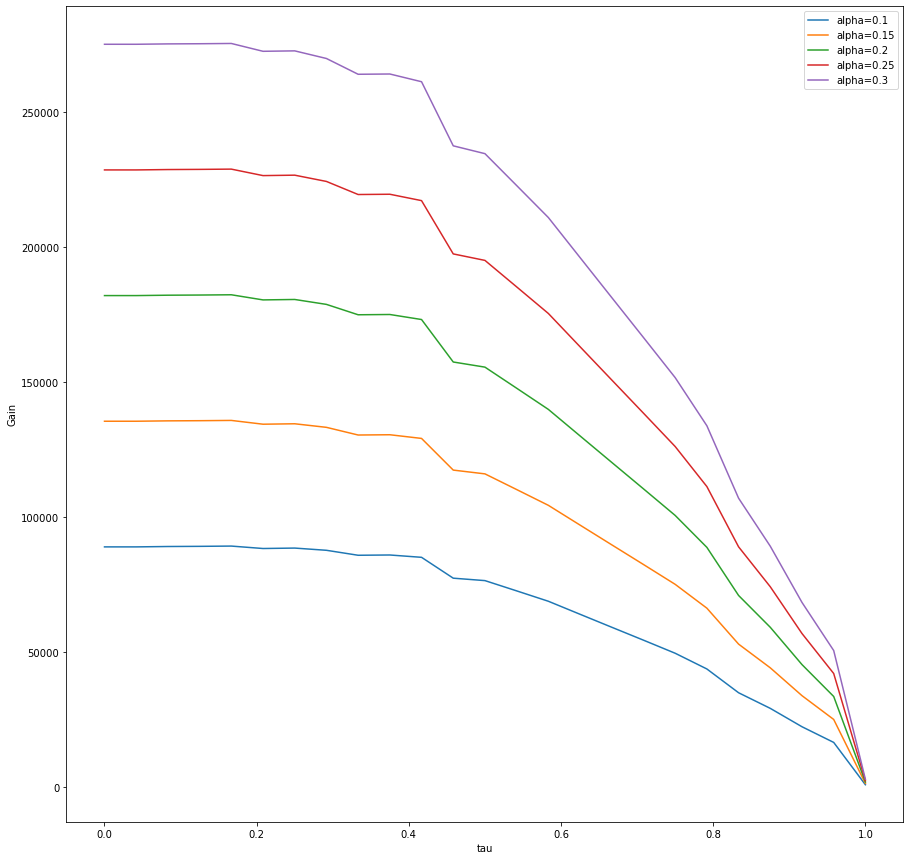

In [15]:
mape.plot_gain(ap_res)

## new overall performance plot

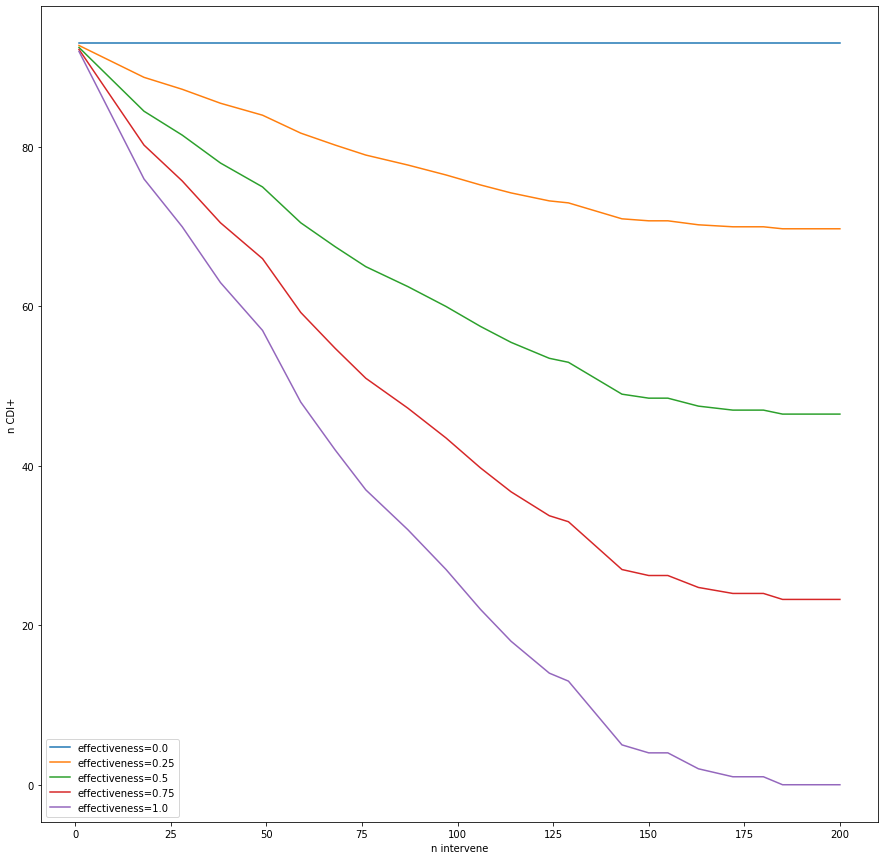

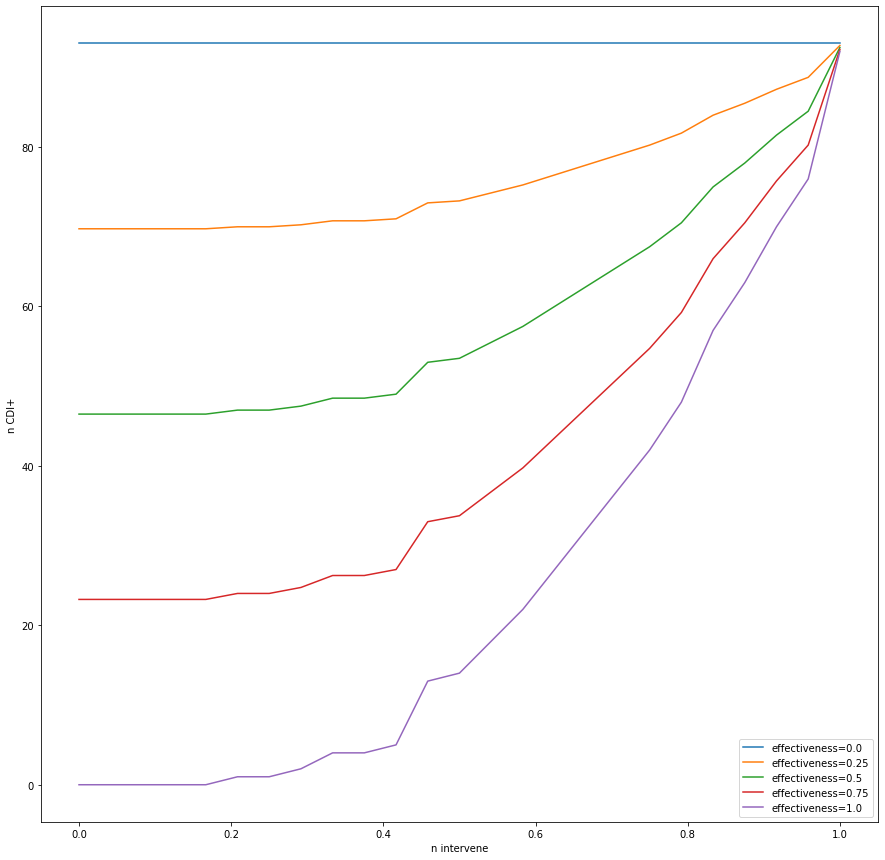

In [16]:
_ = mape.plot_effectiveness(ap_res)

In [17]:
# alerts

In [18]:
oc_res

,observer,tau,n_alerts
0,0,0.000000,71
1,2,0.000000,64
2,1,0.000000,65
3,0,0.041667,71
4,2,0.041667,64
...,...,...,...
70,2,0.958333,5
71,1,0.958333,8
72,0,1.000000,0
73,2,1.000000,0
